In [3]:
import torch 
from torch import nn
import matplotlib.pyplot as plt


In [5]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor


In [6]:
#import training data

train_data = datasets.FashionMNIST(
    root="vdata", #which folder
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# creating test data
test_data = datasets.FashionMNIST(
    root="vdata",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████████████████████████████████| 26.4M/26.4M [00:07<00:00, 3.76MB/s]
100%|███████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 139kB/s]
100%|██████████████████████████████████████| 4.42M/4.42M [00:02<00:00, 1.78MB/s]
100%|██████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 3.06MB/s]


In [13]:
#check a few lines

image,label = train_data[0]

image,label

ValueError: too many values to unpack (expected 2)

In [14]:
image.shape

torch.Size([1, 28, 28])

In [20]:
len(train_data.data),len(test_data.targets)

(60000, 10000)

In [21]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '1')

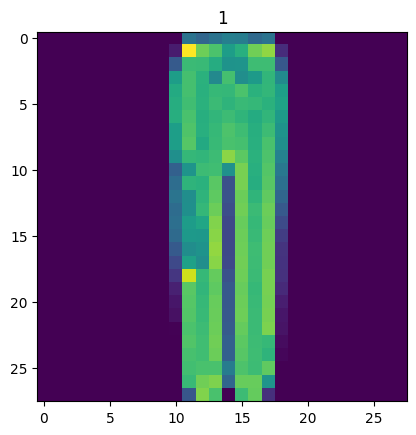

In [25]:
#visualize the first img
img,lbl = train_data[1000]
plt.imshow(img.squeeze())
plt.title(lbl)

Text(0.5, 1.0, '1')

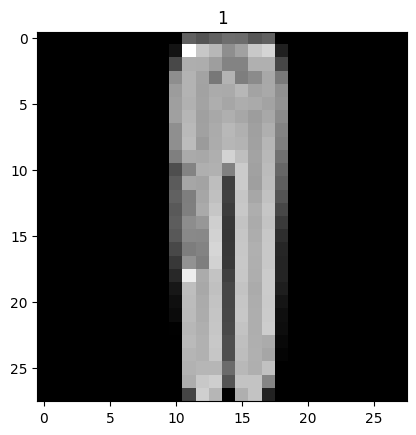

In [31]:
# change the color of the plot
plt.imshow(img.squeeze(),cmap="gray")
plt.title(lbl)

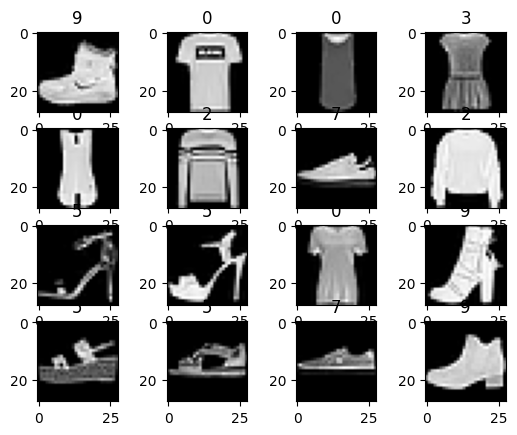

In [34]:
torch.manual_seed(10)
for num in range(16):
    img,lbl = train_data[num]
    plt.subplot(4,4,num+1)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(lbl)

In [35]:
#data loader to prepare data
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x128718da0>, <torch.utils.data.dataloader.DataLoader object at 0x1288832c0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [40]:
train_batches_data,train_batches_labels = next(iter(train_dataloader))
train_batches_data.shape,train_batches_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [76]:
#baseline model by flatten

flatten_model = nn.Flatten()

peek_y = flatten_model(train_batches_data[:10]) #[color_channels, height, width] --> [color_channels, height*width]

In [77]:
peek_y.shape

torch.Size([10, 784])

In [86]:
#model building
class base(nn.Module):
    def __init__(self,inf,outf,hidden=10):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(inf,hidden)
        self.layer2 = nn.Linear(hidden,outf)
        
    def forward(self,x):
        x = self.layer2(self.layer1(self.flatten(x)))
        return x
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
basemodel = base(784,len(train_data.classes)).to(device="cpu")

In [80]:
y1 = basemodel(peek_y.to(device))
print(y1)
y_p = torch.softmax(y1.squeeze(),dim=1)
print(y_p)
y_l = y_p.argmax(dim=1)
print(y_l)

tensor([[-0.2877, -0.1539, -0.2284,  0.1583, -0.0125, -0.1416, -0.3057, -0.2095,
         -0.0493, -0.0586],
        [-0.1531, -0.2253, -0.2140,  0.1001,  0.0699,  0.0541, -0.3705, -0.3495,
         -0.2016, -0.0624],
        [-0.0771, -0.0395, -0.1410, -0.0726, -0.0162, -0.1187, -0.3834, -0.1736,
         -0.1548,  0.1237],
        [-0.3637,  0.0073, -0.3112,  0.2181,  0.0563, -0.1405, -0.2819, -0.1156,
         -0.0140, -0.2305],
        [-0.3688, -0.0104, -0.2989,  0.2074,  0.0180, -0.1156, -0.3253, -0.1726,
         -0.0102, -0.1604],
        [-0.3684,  0.1197, -0.2619,  0.2209,  0.1025, -0.1764, -0.2188, -0.0331,
          0.0420, -0.1672],
        [-0.2661, -0.0967, -0.2183,  0.0434, -0.1109,  0.0852, -0.2795, -0.3802,
         -0.1248, -0.0507],
        [-0.1662, -0.2416, -0.1454,  0.0427, -0.0560,  0.1203, -0.4196, -0.4433,
         -0.2418, -0.1174],
        [-0.0999, -0.2464, -0.3147,  0.0174,  0.0621, -0.2389, -0.3910, -0.0942,
         -0.1866,  0.0336],
        [-0.3707,  

In [65]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [88]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=basemodel.parameters(), lr=0.1)

In [89]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [96]:
# progress bar
from tqdm.auto import tqdm
torch.manual_seed(10)
train_time_start_on_cpu = timer()

#train loop
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"epoch: {epoch}: -------- ")
    train_loss = 0
    
    for batch, (X,y) in enumerate(train_dataloader):
    
        basemodel.train()
        
        #forward pass
        logits = basemodel(X)
        # y_softmax = torch.softmax(logits.squeeze(),dim=1)
        # y_labels = y_softmax.argmax(dim=1)
        
        #loss cal
        batch_loss = loss_fn(logits,y)
        train_loss += batch_loss
        
        #optimizer zero_grad
        optimizer.zero_grad()

        #loss backpropogation
        batch_loss.backward()

        #update grad
        optimizer.step()
    
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # average loss per batch
    avg_loss = train_loss/len(train_dataloader)

    #testing
    basemodel.eval()
    test_loss = 0 # 因为有batch
    with torch.inference_mode():
        for batch, (X,y) in enumerate(test_dataloader):
            
            test_logits = basemodel(X)
            test_preds = torch.softmax(test_logits.squeeze(),dim=1).argmax(dim=1)
            test_loss += loss_fn(test_logits,y)
    
            #accuracy
            test_acc = accuracy_fn(y_true=y, y_pred=test_logits.argmax(dim=1))
        # avg test loss
        
        avg_test_loss = test_loss /len(test_dataloader)
        avg_acc = test_acc / len(test_dataloader)
        print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(basemodel.parameters()).device))

  0%|                                                     | 0/3 [00:00<?, ?it/s]

epoch: 0: -------- 
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███████████████                              | 1/3 [00:01<00:03,  1.54s/it]


Train loss: 801.42474 | Test loss: 147.34044, Test acc: 87.50%

epoch: 1: -------- 
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████████████████████████████               | 2/3 [00:02<00:01,  1.48s/it]


Train loss: 797.92908 | Test loss: 140.48238, Test acc: 93.75%

epoch: 2: -------- 
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|█████████████████████████████████████████████| 3/3 [00:04<00:00,  1.47s/it]


Train loss: 793.15173 | Test loss: 143.64610, Test acc: 87.50%

Train time on cpu: 4.419 seconds


In [97]:
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=basemodel, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'base',
 'model_loss': 0.4589332342147827,
 'model_acc': 84.21525559105432}

In [99]:
import torch
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [106]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,inf,outf,hidden=10):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(inf,hidden)
        self.layer2 = nn.Linear(hidden,hidden)
        self.layer3 = nn.Linear(hidden,outf)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.flatten(x)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        return x 


torch.manual_seed(10)
model_1 = FashionMNISTModelV1(784, # number of input features
    len(train_data.classes),
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='mps', index=0)

In [107]:
model_1.state_dict

<bound method Module.state_dict of FashionMNISTModelV1(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=10, bias=True)
  (relu): ReLU()
)>

In [108]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

In [111]:
#create two func to make codes look more tidy
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device,
              ):
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch,(X,y) in enumerate(data_loader):
        X,y = X.to(device),y.to(device)
        #forward
        logits = model(X)

        #caculate loss
        loss = loss_fn(logits,y)
        train_loss += loss
        train_acc += accuracy_fn(y,logits.argmax(dim=1))

        #zero grad
        optimizer.zero_grad()

        #back propogation
        loss.backward()

        #update the grad
        optimizer.step()

    train_loss /= len(data_loader) 
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss,test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(data_loader):
            X,y = X.to(device), y.to(device)

            #forward
            logits = model(X)
            
            #loss
            loss = loss_fn(logits,y)
            acc = accuracy_fn(y,logits.argmax(dim=1))

            test_loss += loss
            test_acc += acc
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [113]:
# start training
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|                                                     | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.64379 | Train accuracy: 78.16%


 33%|███████████████                              | 1/3 [00:04<00:08,  4.42s/it]

Test loss: 0.67371 | Test accuracy: 76.80%

Epoch: 1
---------
Train loss: 0.63330 | Train accuracy: 78.46%


 67%|██████████████████████████████               | 2/3 [00:08<00:04,  4.26s/it]

Test loss: 0.68904 | Test accuracy: 76.41%

Epoch: 2
---------
Train loss: 0.62531 | Train accuracy: 78.62%


100%|█████████████████████████████████████████████| 3/3 [00:12<00:00,  4.24s/it]

Test loss: 0.67508 | Test accuracy: 77.15%



In [114]:
#build a CNN 
#Q2 为什么要有三个 Convolution layer?

class cnn_model(nn.Module):
    def __init__(self,inf,outf,hidden=10):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(inf,hidden,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden,hidden,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden,hidden,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden,hidden,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden*7*7,outf)
        )
    
    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
torch.manual_seed(42)

cnn_model = cnn_model(inf=1,outf=10)
cnn_model

cnn_model(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [118]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=cnn_model.parameters(),lr=0.1)

In [119]:
epochs = 3
for epoch in tqdm(range(epochs)):
    cnn_model.train()

    train_step(
        data_loader=train_dataloader,
        model=cnn_model,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )

    test_step(
        data_loader=test_dataloader,
        model=cnn_model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device,
    )



  0%|                                                     | 0/3 [00:00<?, ?it/s]

Train loss: 0.57595 | Train accuracy: 79.17%


 33%|███████████████                              | 1/3 [00:06<00:13,  6.92s/it]

Test loss: 0.40057 | Test accuracy: 85.15%

Train loss: 0.35276 | Train accuracy: 87.41%


 67%|██████████████████████████████               | 2/3 [00:12<00:06,  6.13s/it]

Test loss: 0.35391 | Test accuracy: 87.06%

Train loss: 0.31531 | Train accuracy: 88.73%


100%|█████████████████████████████████████████████| 3/3 [00:18<00:00,  6.01s/it]

Test loss: 0.33109 | Test accuracy: 88.02%



In [120]:
# 1. Make predictions with trained model
y_preds = []
cnn_model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = cnn_model(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|████████████████████| 313/313 [00:00<00:00, 522.18it/s]
